

# Feature Engineering on the Titanic dataset




### Aims

Go through each column of the titanic dataset.

check wether the column is binary, categorical or metric.

check wether the column contains any missing values.

make a list of preprocessors that you want to apply to each column.

What Feature Engineerings could improve the model?

### Import libraries

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.shape

(891, 12)

In [4]:
df_test.shape

(418, 11)

### 3.1 Separate features and label (target)
- `X`:= is the array of features used to predict. It's a multidimensional array (or matrix, or a dataframe in pandas)
- `y`:= is the array of labels to be predicted. It's an array with a single dimension (or a vector, or a series in pandas)

In [5]:
X_train = df_train.loc[:, df_train.columns != 'Survived']
y_train = df_train['Survived'].to_frame()

In the Titanic dataset your y is the column **Survived**

### 3.2 Train-Test split

In [6]:
#!conda install -c conda-forge scikit-learn
#!pip install scikit-learn

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# using the train test split function
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train ,
                                   random_state=104,
                                   stratify=y_train,
                                   test_size=0.2, 
                                   shuffle=True)


In [9]:
# Always check the shape of your train and test arrays to check if this was done correctly
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 11), (179, 11), (712, 1), (179, 1))

In [26]:
y_val

,Survived
134,0
183,1
608,1
85,1
287,0
...,...
593,0
149,0
194,1
836,0


In [10]:
# Combine back Xtrain, ytrain

df_train = pd.concat([X_train,y_train], axis=1)
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
805,806,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.775,NaN,S,0
665,666,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.500,NaN,S,0
320,321,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.250,NaN,S,0
667,668,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S,0
763,764,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.000,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.750,C111,C,0
376,377,3,"Landergren, Miss. Aurora Adelia",female,22.0,0,0,C 7077,7.250,NaN,S,1
282,283,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.500,NaN,S,0
612,613,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.500,NaN,Q,1


In [11]:
df_train.info()  # type of all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 805 to 634
Data columns (total 12 columns):
PassengerId    712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            564 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          162 non-null object
Embarked       710 non-null object
Survived       712 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [12]:
df_train.isna().sum()  #Age, Cabin and Embarked has missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            148
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         2
Survived         0
dtype: int64

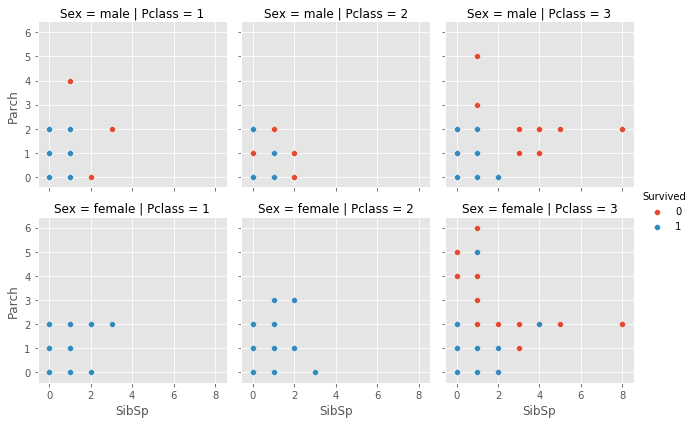

In [13]:
g = sns.FacetGrid(data=df_train, hue='Survived', col='Pclass', row='Sex')
g.map(sns.scatterplot, 'SibSp', 'Parch')
g.add_legend()
plt.show()

In [14]:
#1)  PassengerId  
#2)  Pclass   ordinal categorical--> one-hot-encode
#3)  Name         
#4)  Sex     one-hot-encode
#5)  Age     imputation the missing values and bins (young, middle-aged, old)
#6)  SibSp        
#7)  Parch        
#8)  Ticket       
#9)  Fare     scaling
#10) Cabin        
#11) Embarked  imputation, one-hot-encode 
#12) Survived

## Featuring Engeneering

In [15]:
impute_and_then_bin = make_pipeline(SimpleImputer(strategy = 'median'), 
                                    KBinsDiscretizer(encode='onehot-dense'))

impute_and_then_ohe = make_pipeline(SimpleImputer(strategy = 'most_frequent'), 
                                    OneHotEncoder(sparse = False, drop = 'first'))


In [16]:
# got the error with impute_and_then_ohe = make_pipeline(SimpleImputer(strategy = 'median'), 
                                    #OneHotEncoder(sparse = False, drop = 'first'))

In [17]:
#it is tuple (name, transformer,columns)
fe = ColumnTransformer([('ohe_isclass', OneHotEncoder(sparse=False), ['Pclass']),
                        ('ohe_issex', OneHotEncoder(sparse=False), ['Sex']),
                        ('impute_and_then_bin', impute_and_then_bin, ['Age']),
                        ('scaling', MinMaxScaler(), ['Fare']),
                        ('impute_and_then_ohe', impute_and_then_ohe, ['Embarked'])
                       ])

fe

ColumnTransformer(transformers=[('ohe_isclass', OneHotEncoder(sparse=False),
                                 ['Pclass']),
                                ('ohe_issex', OneHotEncoder(sparse=False),
                                 ['Sex']),
                                ('impute_and_then_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age']),
                                ('scaling', MinMaxScaler(), ['Fare']),
                                ('impute_and_then_ohe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Embarked'])])

In [18]:
# fit the column transformer on the training data
fe.fit(X_train)


# transform the training data
X_train_tran = fe.transform(X_train)
pd.DataFrame(X_train_tran, columns= fe.get_feature_names_out())

/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ig

,ohe_isclass__Pclass_1,ohe_isclass__Pclass_2,ohe_isclass__Pclass_3,ohe_issex__Sex_female,ohe_issex__Sex_male,impute_and_then_bin__Age_0.0,impute_and_then_bin__Age_1.0,impute_and_then_bin__Age_2.0,impute_and_then_bin__Age_3.0,scaling__Fare,impute_and_then_ohe__Embarked_Q,impute_and_then_ohe__Embarked_S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015176,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.143462,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.014151,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.015176,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.234224,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.054164,0.0,0.0
708,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.014151,0.0,1.0
709,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.018543,0.0,1.0
710,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.030254,1.0,0.0


In [19]:
# transform the test data
X_val_tran = fe.transform(X_val)
pd.DataFrame(X_val_tran, columns= fe.get_feature_names_out())

,ohe_isclass__Pclass_1,ohe_isclass__Pclass_2,ohe_isclass__Pclass_3,ohe_issex__Sex_female,ohe_issex__Sex_male,impute_and_then_bin__Age_0.0,impute_and_then_bin__Age_1.0,impute_and_then_bin__Age_2.0,impute_and_then_bin__Age_3.0,scaling__Fare,impute_and_then_ohe__Embarked_Q,impute_and_then_ohe__Embarked_S
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.025374,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.076123,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.081157,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.030937,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.015412,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.015127,1.0,0.0
175,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.025374,0.0,1.0
176,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.054107,0.0,0.0
177,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.016908,0.0,1.0


## Train the model

In [20]:
# initialize the model 

m_lgr = LogisticRegression()

# fit the model on the transformed training data
m_lgr.fit(X_train_tran, y_train)

/home/nazila/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
m_lgr.score(X_train_tran, y_train)

0.7851123595505618

### Evaluate the model on the (transformed) test data

In [22]:
# calculate predictions with the transformed test data

# calculate an accuracy score
m_lgr.score(X_val_tran, y_val)

0.8212290502793296

In [23]:
# Building the model together with feature engeenering
one_go_mlr= make_pipeline(fe, LogisticRegression(max_iter=10000))
one_go_mlr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_isclass',
                                                  OneHotEncoder(sparse=False),
                                                  ['Pclass']),
                                                 ('ohe_issex',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('impute_and_then_bin',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Fare']),
                                                 ('impute_and_then_ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [24]:
one_go_mlr.fit(X_train,y_train)

/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/nazila/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ig

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe_isclass',
                                                  OneHotEncoder(sparse=False),
                                                  ['Pclass']),
                                                 ('ohe_issex',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('impute_and_then_bin',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='onehot-dense'))]),
                                                  ['Age']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Fare']),
                                                 ('impute_and_then_ohe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Embarked'])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [25]:
one_go_mlr.score(X_val,y_val)

0.8212290502793296